**Import the necessary packages**


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Analysing data from source 1

Created new dataframe having contents from all the csvs downloaded.

In [3]:
out_df1 = pd.read_csv("source1.csv")

In [4]:
#Trying to view the combined data
out_df1.head

<bound method NDFrame.head of         Operator In_Out_Travelling Network_Type  Rating  Call_Drop_Category  \
0           RJio            Indoor           4G       1  Poor Voice Quality   
1           RJio            Indoor           4G       1  Poor Voice Quality   
2           BSNL            Indoor      Unknown       5        Satisfactory   
3           BSNL            Indoor      Unknown       5        Satisfactory   
4       Vodafone           Outdoor      Unknown       1  Poor Voice Quality   
...          ...               ...          ...     ...                 ...   
216939        VI           Outdoor           4G       4        Satisfactory   
216940        VI            Indoor           4G       4        Satisfactory   
216941        VI            Indoor           4G       4        Satisfactory   
216942        VI            Indoor           4G       5        Satisfactory   
216943      RJio            Indoor           4G       4        Satisfactory   

         Latitude  Lo

There are around 4+ lakhs of data records in this type 1 source

In [5]:
out_df1['Operator'] = out_df1['Operator'].str.replace('JIO', 'RJio').str.replace('Vi India', 'VI').str.replace('AIRTEL', 'Airtel')


In [6]:
#Stats related to average rating of each operator over all the states and all type of network
operator = out_df1.groupby("Operator")
average_rating = operator.agg({'Rating': 'mean'}).dropna()
average_rating

,Rating
Operator,
Airtel,3.270977
BSNL,3.530979
Idea,4.335107
MTNL,3.910032
Other,3.220999
RJio,3.293323
Tata,3.000000
Telenor,4.000000
VI,3.800528


In [7]:
#Average rating also depends on no of ratings we have collected for each operator
operator["Operator"].count()

Operator
Airtel      55872
BSNL        17899
Idea        33637
MTNL         3090
Other        2543
RJio        66599
Tata            1
Telenor         1
VI           4166
Vodafone    33136
Name: Operator, dtype: int64

From the above it is clear that the records are mostly of Airtel,RJio,Idea and Vodafone. For other operators significant data is not available

In [8]:
operator_based_state = out_df1.groupby(['Operator', 'State_Name'])['Rating'].agg({'count', 'mean'}).reset_index()
operator_based_state

,Operator,State_Name,count,mean
0,Airtel,Andaman and Nicobar,8,2.375000
1,Airtel,Andhra Pradesh,3312,3.417572
2,Airtel,Arunachal Pradesh,7,2.142857
3,Airtel,Assam,222,2.409910
4,Airtel,Bihar,170,2.452941
...,...,...,...,...
190,Vodafone,Telangana,1131,4.804598
191,Vodafone,Tripura,1,1.000000
192,Vodafone,Uttar Pradesh,1160,2.761207
193,Vodafone,Uttarakhand,9,1.444444


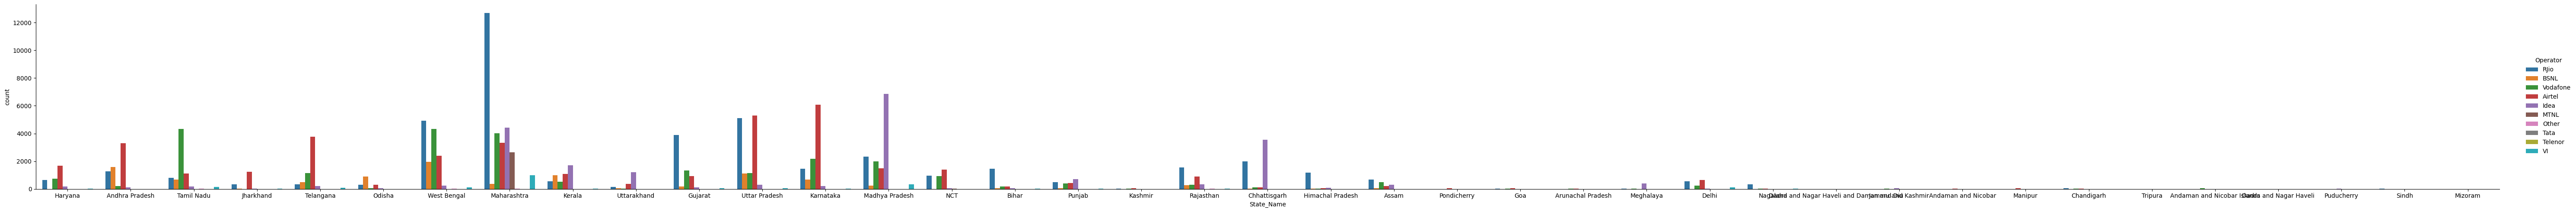

In [9]:
sns.catplot(data=out_df1,kind='count',x='State_Name',hue='Operator',aspect=11.7/1)

* In the above plot I am just trying to understand the distribution of different states records w.r.t different operators.
* From the plot it can be assumed that only few states have significant no of records for different operators.
* States like Manipur,Arunachal Pradesh ,Pondichery,Tripura have very less records.

Now I am trying to plot average rating of different operator in different states

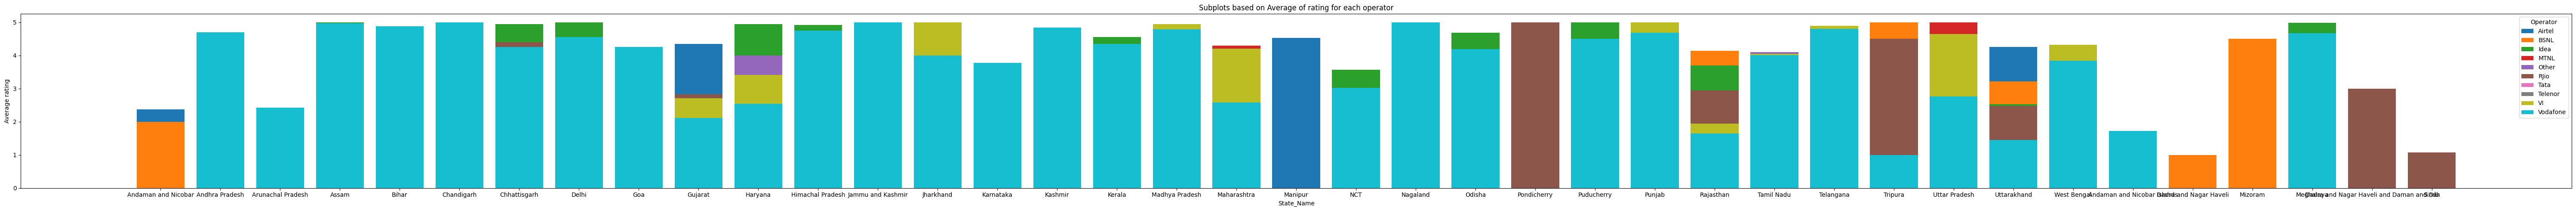

In [10]:
fig, ax = plt.subplots(figsize=(60, 5))  # Create a figure and axis for subplots

# Loop through the unique values in the first grouped column
for key, group in operator_based_state.groupby('Operator'):
    ax.bar(group['State_Name'], group['mean'], label=key,alpha=1)
ax.set_xlabel('State_Name')
ax.set_ylabel('Average rating')
ax.set_title('Subplots based on Average of rating for each operator')
ax.legend(title='Operator')

plt.tight_layout() 
plt.show()  

Now I am tring to analyse **overall network rating of different states**.This will give an idea on how developed state is w.r.t network coverage be it any provider.

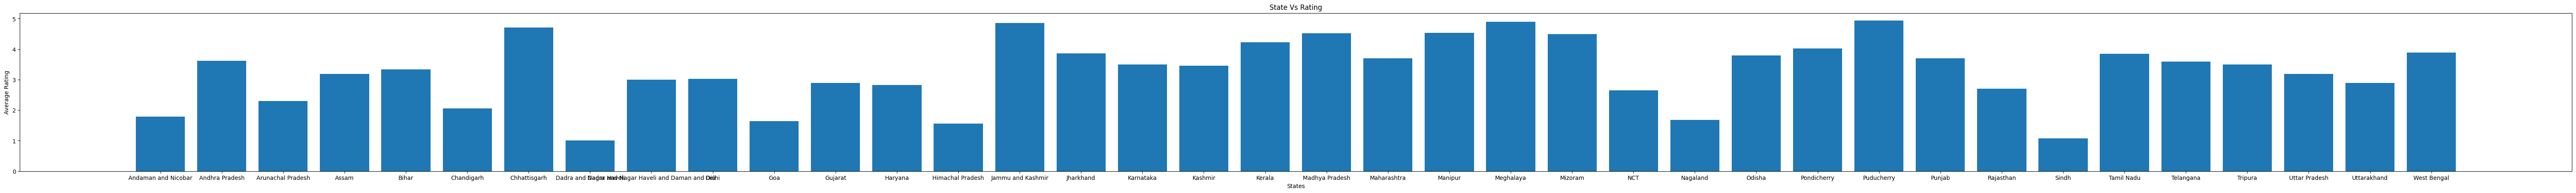

In [11]:
out_df1['State_Name'] = out_df1['State_Name'].str.replace('Andaman and Nicobar Islands', 'Andaman and Nicobar')
grouped_data = out_df1.groupby('State_Name')['Rating'].mean().reset_index()
plt.figure(figsize=(80, 5))
plt.bar(grouped_data['State_Name'], grouped_data['Rating'])
plt.xlabel('States')
plt.ylabel('Average Rating')
plt.title('State Vs Rating')
plt.show()

* From the bar graph we can observe that States like Arunachal Pradesh,Chandigarh, Goa,Himachal Pradesh,Nagaland got poor quality w.r.t others


Now I am trying to analyse the stats w.r.t **operators** from **2020 to 2021**

In [12]:
# df = out_df.groupby(['year', 'Operator']).count()['Operator']
year_data = out_df1.groupby(['year','Operator'])['Rating'].agg({'count', 'mean'}).reset_index()
year_data

,year,Operator,count,mean
0,2020,Airtel,44644,3.195121
1,2020,BSNL,14085,3.443876
2,2020,Idea,26715,4.314468
3,2020,MTNL,2837,4.027494
4,2020,Other,2543,3.220999
5,2020,RJio,49861,3.294078
6,2020,Tata,1,3.000000
7,2020,Telenor,1,4.000000
8,2020,Vodafone,27794,3.467187
9,2021,Airtel,11228,3.572586


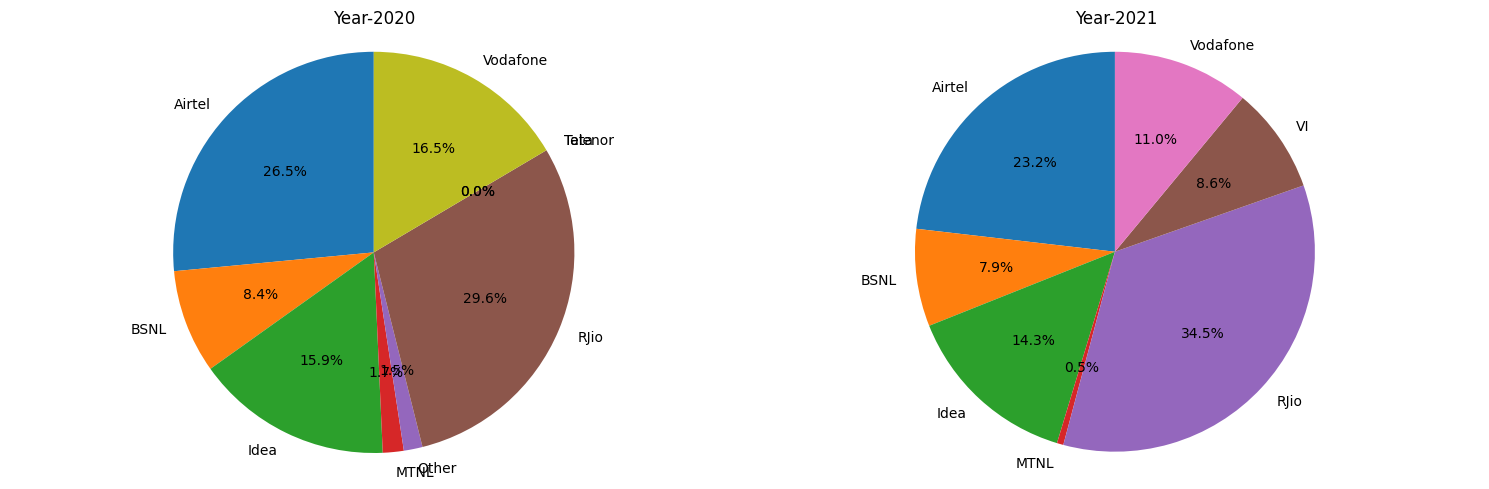

In [13]:
# Get unique values of column1
unique_column1_values = year_data['year'].unique()
# print(unique_column1_values)
# Create subplots for each unique value in column1
fig, axes = plt.subplots(1, len(unique_column1_values), figsize=(15, 5))

# Loop through each unique value in column1 and create a pie chart
for i, value in enumerate(unique_column1_values):
    group = year_data[year_data['year'] == value]
    labels = group['Operator']
    sizes = group['count']
    ax = axes[i]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title(f'Year-{value}')

plt.tight_layout()
plt.show()


* From 2020 to 2021 we can see the percentage increment in Jio stats indicating increase in people who have opted for Jio .
* Also Percentage drop can be observed in BSNL,MTNL customers
* Also merge of Vodafone and Idea(VI) users emerging in year 2021

### Now some analysis on different network type provided by different operators

In [14]:
unique_newtwork_type = out_df1['Network_Type'].unique()
unique_newtwork_type

array(['4G', 'Unknown', '3G', '2G', nan], dtype=object)

In [15]:
#Trying to get mean rating of different network providers for different type of network
operator_networktype = out_df1.groupby(['Network_Type','Operator'])['Rating'].agg({'count','mean'}).reset_index()
operator_networktype

,Network_Type,Operator,count,mean
0,2G,Airtel,2497,3.064077
1,2G,BSNL,2282,2.744084
2,2G,Idea,1811,4.324682
3,2G,MTNL,17,1.294118
4,2G,Other,4,4.500000
5,2G,RJio,43,2.325581
6,2G,VI,103,3.038835
7,2G,Vodafone,2156,3.668831
8,3G,Airtel,1444,3.109418
9,3G,BSNL,7397,3.575774


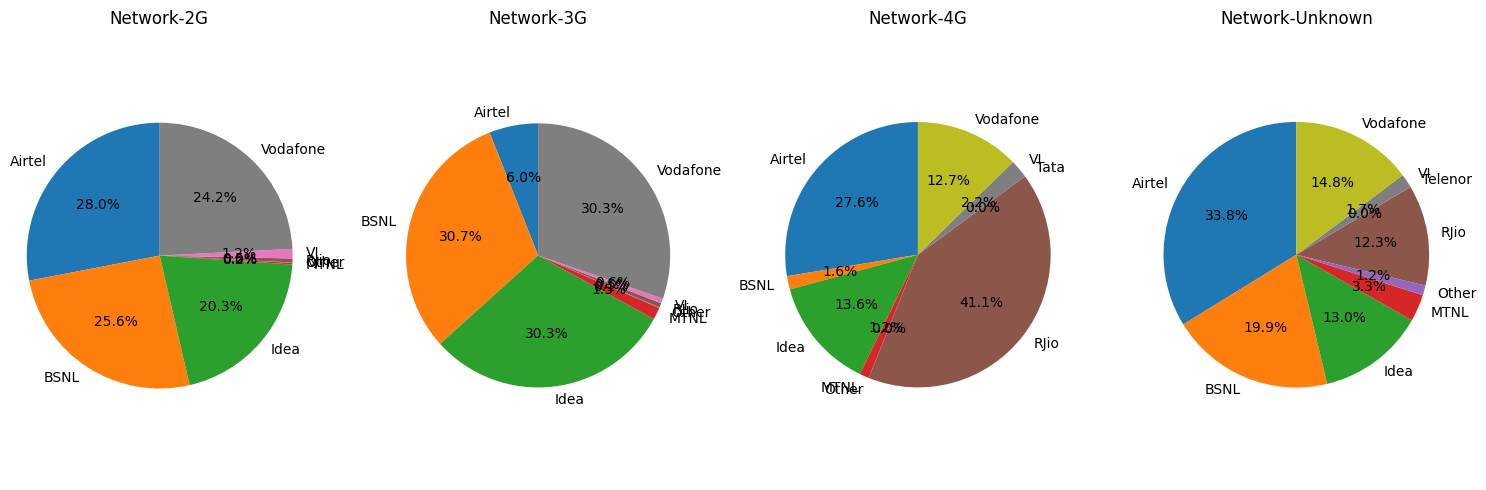

In [16]:
unique_column1_values = operator_networktype['Network_Type'].unique()
# print(unique_column1_values)
# Create subplots for each unique value in column1
fig, axes = plt.subplots(1, len(unique_column1_values), figsize=(15, 5))

# Loop through each unique value in column1 and create a pie chart
for i, value in enumerate(unique_column1_values):
    group = operator_networktype[operator_networktype['Network_Type'] == value]
    labels = group['Operator']
    sizes = group['count']
    ax = axes[i]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title(f'Network-{value}')

plt.tight_layout()
plt.show()

* We can clearly see no 2G or 3G service is provided by Jio .So there is no share of Jio in these two area.
* BSNL is not in play when it comes to 4G network
* 40% 4G service provided by Jio,next is airtel in the play and later comes and Idea and Vodafone

In [17]:
out_df1['In_Out_Travelling'] = out_df1['In_Out_Travelling'].astype(str)
out_df1['Network_Type'] = out_df1['Network_Type'].astype(str)
net_type_vs_location = out_df1.groupby(['In_Out_Travelling','Network_Type']).size().unstack(fill_value=0)
net_type_vs_location

Network_Type,2G,3G,4G,Unknown,nan
In_Out_Travelling,,,,,
Indoor,5948,17340,105553,20429,1545
Outdoor,2375,5252,36832,6134,532
Travelling,590,1510,10643,2176,85


* Above stats is on availability of 2G,3G and 4G in different locations
* Data seems bit biased towards 4G as it is mostly available on all loacations
* Data has most records about indoor condition

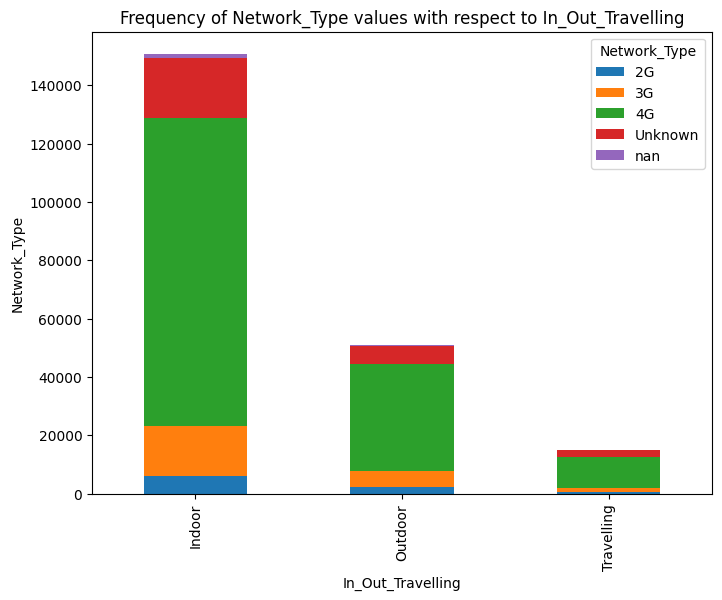

In [18]:
net_type_vs_location.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('In_Out_Travelling')
plt.ylabel('Network_Type')
plt.title('Frequency of Network_Type values with respect to In_Out_Travelling')
plt.legend(title='Network_Type')
plt.show()


# Stats on data from Source 2

Similar data analysis is done on second data source here

In [19]:
out_df = pd.read_csv("source2.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_2840\921100049.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  out_df = pd.read_csv("source2.csv")


In [20]:
out_df['Operator'].unique()

array(['JIO', 'IDEA', 'AIRTEL', 'CELLONE', 'VODAFONE', 'DOLPHIN',
       'Vi India'], dtype=object)

In [21]:
#converting the names of providers so that similarity can be brough in the data of two source
out_df['Operator'] = out_df['Operator'].str.replace('JIO', 'RJio').str.replace('IDEA', 'Idea').str.replace('Vi India', 'VI').str.replace('AIRTEL', 'Airtel').str.replace("VODAFONE","Vodafone")


In [22]:
out_df['State_Name'].unique()

array(['Haryana', 'Gujarat', 'Karnataka', 'Andhra Pradesh', 'Maharashtra',
       'Kerala', 'UP East', 'Tamil Nadu', 'Delhi', 'Bihar', 'West Bengal',
       'UP West', 'Orissa', 'Madhya Pradesh', 'Kolkata',
       'Himachal Pradesh', 'Mumbai', 'Rajasthan', 'Punjab', nan, 'Assam',
       'Chennai', 'North East', 'Jammu & Kashmir'], dtype=object)

In [23]:
out_df.head

<bound method NDFrame.head of         Operator Network_Type Download_Upload  Data_Speed(Kbps)  \
0           RJio           4G        download            1487.0   
1           RJio           4G        download            1242.0   
2           RJio           4G        download            9622.0   
3           RJio           4G        download             837.0   
4           RJio           4G        download            2047.0   
...          ...          ...             ...               ...   
8420360       VI           4G        download            9227.0   
8420361       VI           4G        download             387.0   
8420362       VI           4G        download            1532.0   
8420363       VI           4G        download           12495.0   
8420364       VI           4G        download            2721.0   

        Signal_strength State_Name      month  year  
0                 -97.0    Haryana      April  2020  
1                 -94.0    Haryana      April  2020  
2  

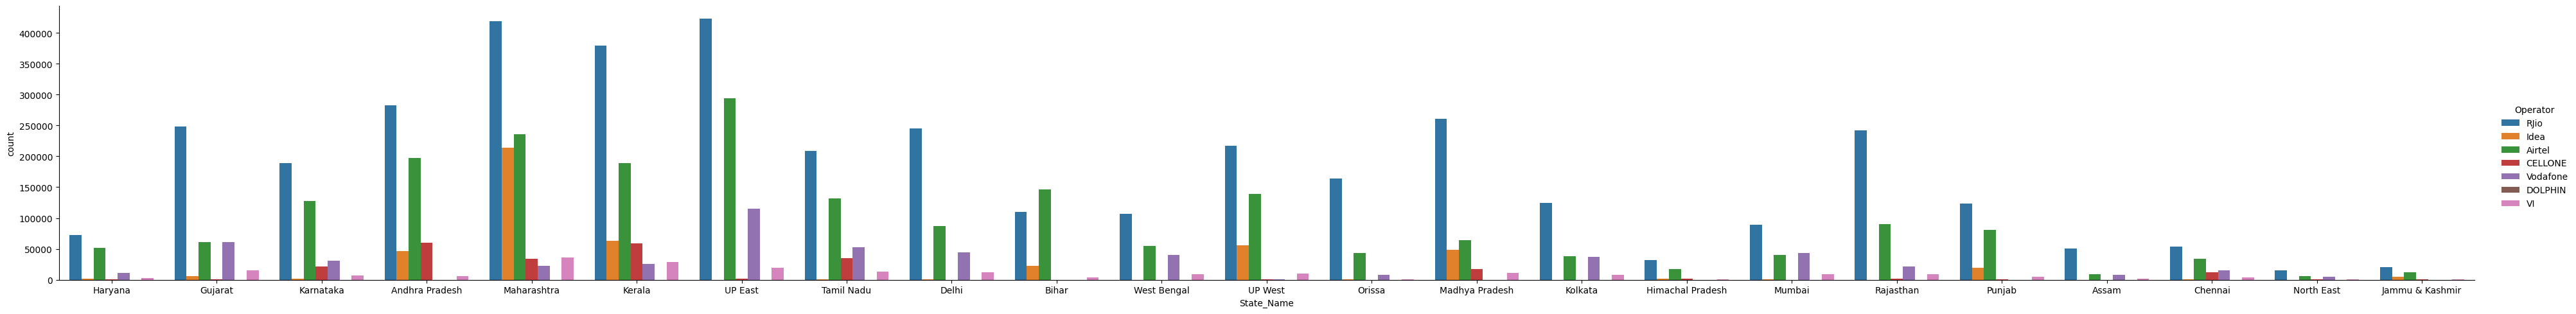

In [24]:
sns.catplot(data=out_df,kind='count',x='State_Name',hue='Operator',aspect=11.7/1.5)

### Since rating of the network is not directly given ,mapping is done based on the below
* -50 to -79 dBm	Considered great signal (4 to 5 bars)
* -80 to -89 dBm	Considered good signal (3 to 4 bars)
* -90 to -99 dBm	Considered average signal (2 to 3 bars)
* -100 to -109 dBm	Considered poor signal (1 to 2 bars)
* -110 to -120 dBm	Considered very poor signal (0 to 1 bar)

In [25]:
out_df = out_df[out_df['Signal_strength'] != 'na']
out_df['Signal_strength'] = out_df['Signal_strength'].astype(float)

out_df['Rating'] = out_df['Signal_strength'].apply(lambda x: 5 if -50>=x>=-79 else (4 if -89>=x>=-80 else (3 if -99<=x<=-90 else(2 if -109<=x<=-100 else 1))))


C:\Users\User\AppData\Local\Temp\ipykernel_2840\803724770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df['Signal_strength'] = out_df['Signal_strength'].astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_2840\803724770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df['Rating'] = out_df['Signal_strength'].apply(lambda x: 5 if -50>=x>=-79 else (4 if -89>=x>=-80 else (3 if -99<=x<=-90 else(2 if -109<=x<=-100 else 1))))


In [26]:
out_df

,Operator,Network_Type,Download_Upload,Data_Speed(Kbps),Signal_strength,State_Name,month,year,Rating
0,RJio,4G,download,1487.0,-97.0,Haryana,April,2020,3
1,RJio,4G,download,1242.0,-94.0,Haryana,April,2020,3
2,RJio,4G,download,9622.0,-92.0,Haryana,April,2020,3
3,RJio,4G,download,837.0,-97.0,Haryana,April,2020,3
4,RJio,4G,download,2047.0,-94.0,Haryana,April,2020,3
...,...,...,...,...,...,...,...,...,...
8420360,VI,4G,download,9227.0,-110.0,NaN,September,2021,1
8420361,VI,4G,download,387.0,-107.0,NaN,September,2021,2
8420362,VI,4G,download,1532.0,-100.0,NaN,September,2021,2
8420363,VI,4G,download,12495.0,-102.0,NaN,September,2021,2


In [27]:
operator_based_state = out_df.groupby(['Operator', 'State_Name'])['Rating'].agg({'count', 'mean'}).reset_index()
operator_based_state

,Operator,State_Name,count,mean
0,Airtel,Andhra Pradesh,188754,2.701548
1,Airtel,Assam,8739,2.574665
2,Airtel,Bihar,138125,2.596988
3,Airtel,Chennai,33148,2.751327
4,Airtel,Delhi,84384,2.693236
...,...,...,...,...
132,Vodafone,Rajasthan,21178,2.482671
133,Vodafone,Tamil Nadu,51044,2.510736
134,Vodafone,UP East,113293,2.474425
135,Vodafone,UP West,561,2.370766


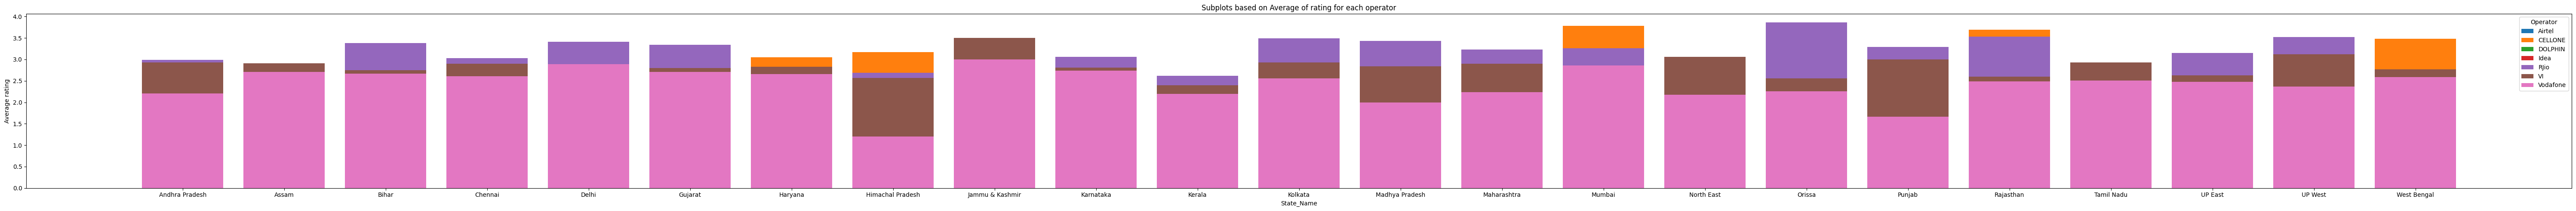

In [28]:
fig, ax = plt.subplots(figsize=(60, 5))  # Create a figure and axis for subplots

for key, group in operator_based_state.groupby('Operator'):
    ax.bar(group['State_Name'], group['mean'], label=key,alpha=1)
ax.set_xlabel('State_Name')
ax.set_ylabel('Average rating')
ax.set_title('Subplots based on Average of rating for each operator')
ax.legend(title='Operator')

plt.tight_layout()  
plt.show() 


C:\Users\User\AppData\Local\Temp\ipykernel_2840\4147808424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df['State_Name'] = out_df['State_Name'].str.replace('Andaman and Nicobar Islands', 'Andaman and Nicobar')


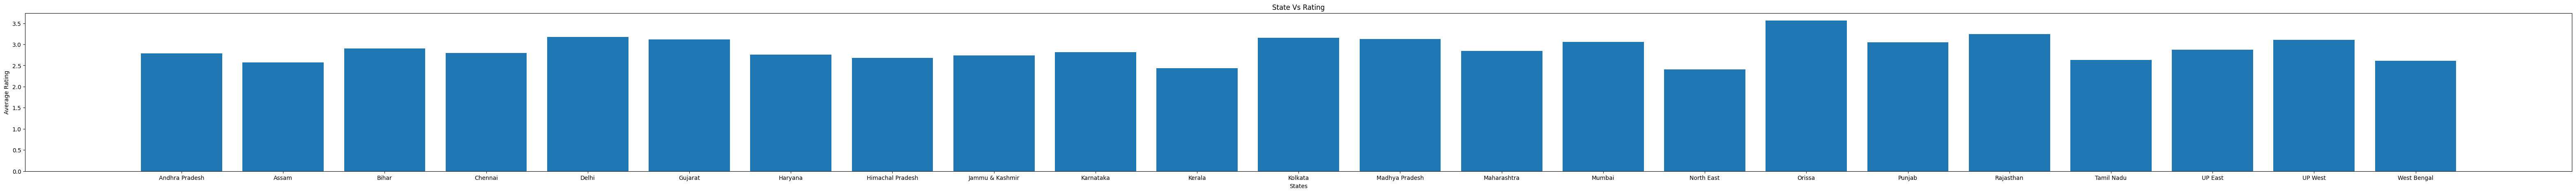

In [29]:
out_df['State_Name'] = out_df['State_Name'].str.replace('Andaman and Nicobar Islands', 'Andaman and Nicobar')
grouped_data = out_df.groupby('State_Name')['Rating'].mean().reset_index()
plt.figure(figsize=(80, 5))
plt.bar(grouped_data['State_Name'], grouped_data['Rating'])
plt.xlabel('States')
plt.ylabel('Average Rating')
plt.title('State Vs Rating')
plt.show()

* RJio has better rating(signal strength) in most of the staes compare to other network providers
* Cellone data is also in majority in this data source

In [30]:
out_df['State_Name'].unique()

array(['Haryana', 'Gujarat', 'Karnataka', 'Andhra Pradesh', 'Maharashtra',
       'Kerala', 'UP East', 'Tamil Nadu', 'Delhi', 'Bihar', 'West Bengal',
       'UP West', 'Orissa', 'Madhya Pradesh', 'Kolkata',
       'Himachal Pradesh', 'Mumbai', 'Rajasthan', 'Punjab', nan, 'Assam',
       'Chennai', 'North East', 'Jammu & Kashmir'], dtype=object)

This data has stats of fewer states compare to source1. Data to estern states are unavailable here.

In [31]:
year_data = out_df.groupby(['year','Operator'])['Rating'].agg({'count', 'mean'}).reset_index()
year_data

,year,Operator,count,mean
0,2020,Airtel,1495756,2.524364
1,2020,CELLONE,173982,1.953955
2,2020,DOLPHIN,120,2.550000
3,2020,Idea,407876,2.381557
4,2020,RJio,2716513,3.006480
5,2020,Vodafone,456318,2.496893
6,2021,Airtel,738469,2.758498
7,2021,CELLONE,54884,2.619962
8,2021,Idea,77548,2.803825
9,2021,RJio,1556212,3.322283


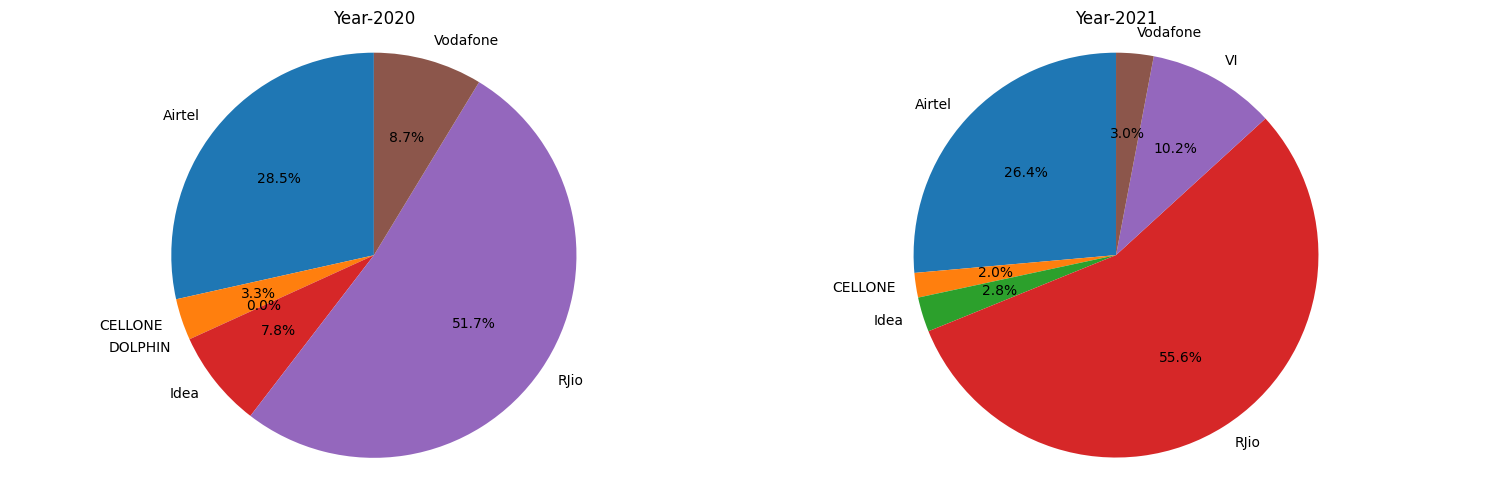

In [32]:
unique_column1_values = year_data['year'].unique()
# print(unique_column1_values)
# Create subplots for each unique value in column1
fig, axes = plt.subplots(1, len(unique_column1_values), figsize=(15, 5))

# Loop through each unique value in column1 and create a pie chart
for i, value in enumerate(unique_column1_values):
    group = year_data[year_data['year'] == value]
    labels = group['Operator']
    sizes = group['count']
    ax = axes[i]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title(f'Year-{value}')

plt.tight_layout()
plt.show()

* Jio seems to be a major player in both the years data
* Airtel Bags the second place
* Vodafone and Idea comes later part

In [33]:
unique_newtwork_type = out_df['Network_Type'].unique()
unique_newtwork_type

array(['4G', '3G'], dtype=object)

In [34]:
operator_networktype = out_df.groupby(['Network_Type','Operator'])['Rating'].agg({'count','mean'}).reset_index()
operator_networktype

,Network_Type,Operator,count,mean
0,3G,Airtel,6811,1.777125
1,3G,CELLONE,162037,1.904127
2,3G,DOLPHIN,120,2.550000
3,3G,Idea,44875,1.839844
4,3G,VI,11729,2.866911
5,3G,Vodafone,31465,1.819895
6,4G,Airtel,2227414,2.604272
7,4G,CELLONE,66829,2.621736
8,4G,Idea,440549,2.511067
9,4G,RJio,4272725,3.121502


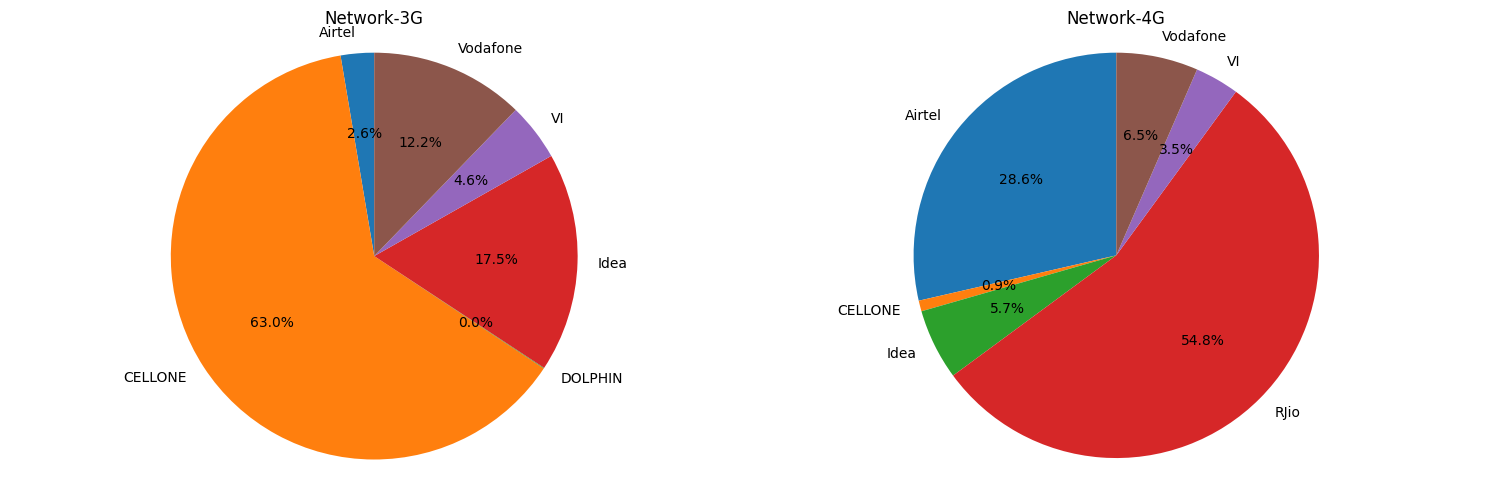

In [35]:
unique_column1_values = operator_networktype['Network_Type'].unique()
# print(unique_column1_values)
# Create subplots for each unique value in column1
fig, axes = plt.subplots(1, len(unique_column1_values), figsize=(15, 5))

# Loop through each unique value in column1 and create a pie chart
for i, value in enumerate(unique_column1_values):
    group = operator_networktype[operator_networktype['Network_Type'] == value]
    labels = group['Operator']
    sizes = group['count']
    ax = axes[i]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title(f'Network-{value}')

plt.tight_layout()
plt.show()

* In this data source When it comes to 3G Cellone is major player covering 63% of the data.
* Since Jio does not support 3G it can be observed in 4G only

In [36]:
out_df['Download_Upload'] = out_df['Download_Upload'].astype(str)
out_df['Network_Type'] = out_df['Network_Type'].astype(str)
net_type_vs_location = out_df.groupby(['Download_Upload','Network_Type']).size().unstack(fill_value=0)
net_type_vs_location

C:\Users\User\AppData\Local\Temp\ipykernel_2840\681927032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df['Download_Upload'] = out_df['Download_Upload'].astype(str)
C:\Users\User\AppData\Local\Temp\ipykernel_2840\681927032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df['Network_Type'] = out_df['Network_Type'].astype(str)


Network_Type,3G,4G
Download_Upload,,
download,128453,3896228
upload,128584,3894011


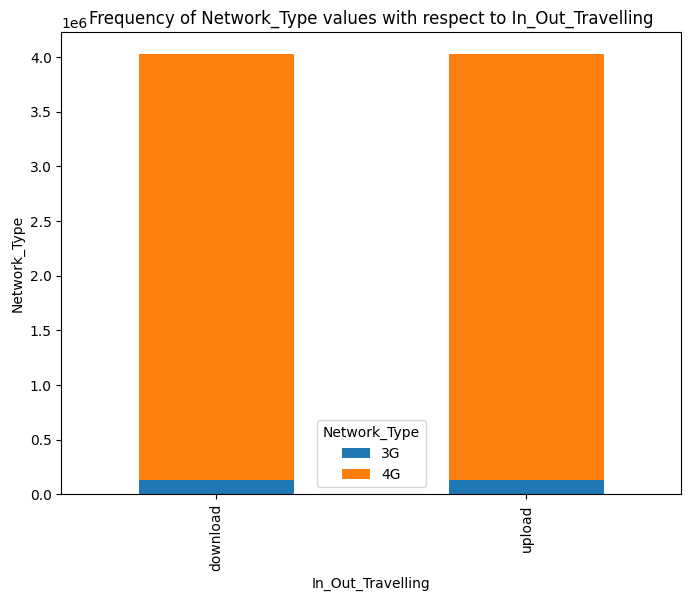

In [37]:
net_type_vs_location.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('In_Out_Travelling')
plt.ylabel('Network_Type')
plt.title('Frequency of Network_Type values with respect to In_Out_Travelling')
plt.legend(title='Network_Type')
plt.show()

* Since jio is the major player in 4G and has larger share in the industry we can see for downloading and uploading 4G is majorly used.


In [38]:
type_net = out_df.groupby("Network_Type")
average_speed = type_net.agg({'Data_Speed(Kbps)': 'mean'})
average_speed

,Data_Speed(Kbps)
Network_Type,
3G,1666.371579
4G,9187.814578


#### * 4G is approximately 10 times faster than 3G which can be backed by this data where mean data speed tells the same

## Below is the data speed of different states w.r.t different operators

In [39]:
data_speed_based_state = out_df.groupby(['Operator', 'State_Name'])['Data_Speed(Kbps)'].agg({'count', 'mean'}).reset_index()
data_speed_based_state

,Operator,State_Name,count,mean
0,Airtel,Andhra Pradesh,180323,8549.717219
1,Airtel,Assam,8451,3450.274050
2,Airtel,Bihar,129880,5088.318148
3,Airtel,Chennai,30927,6179.969250
4,Airtel,Delhi,82217,4736.021869
...,...,...,...,...
132,Vodafone,Rajasthan,21178,6060.319719
133,Vodafone,Tamil Nadu,51044,6540.359259
134,Vodafone,UP East,113293,6340.447539
135,Vodafone,UP West,561,3822.647059


C:\Users\User\AppData\Local\Temp\ipykernel_2840\872518216.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(operator_data['State_Name'], rotation=45)


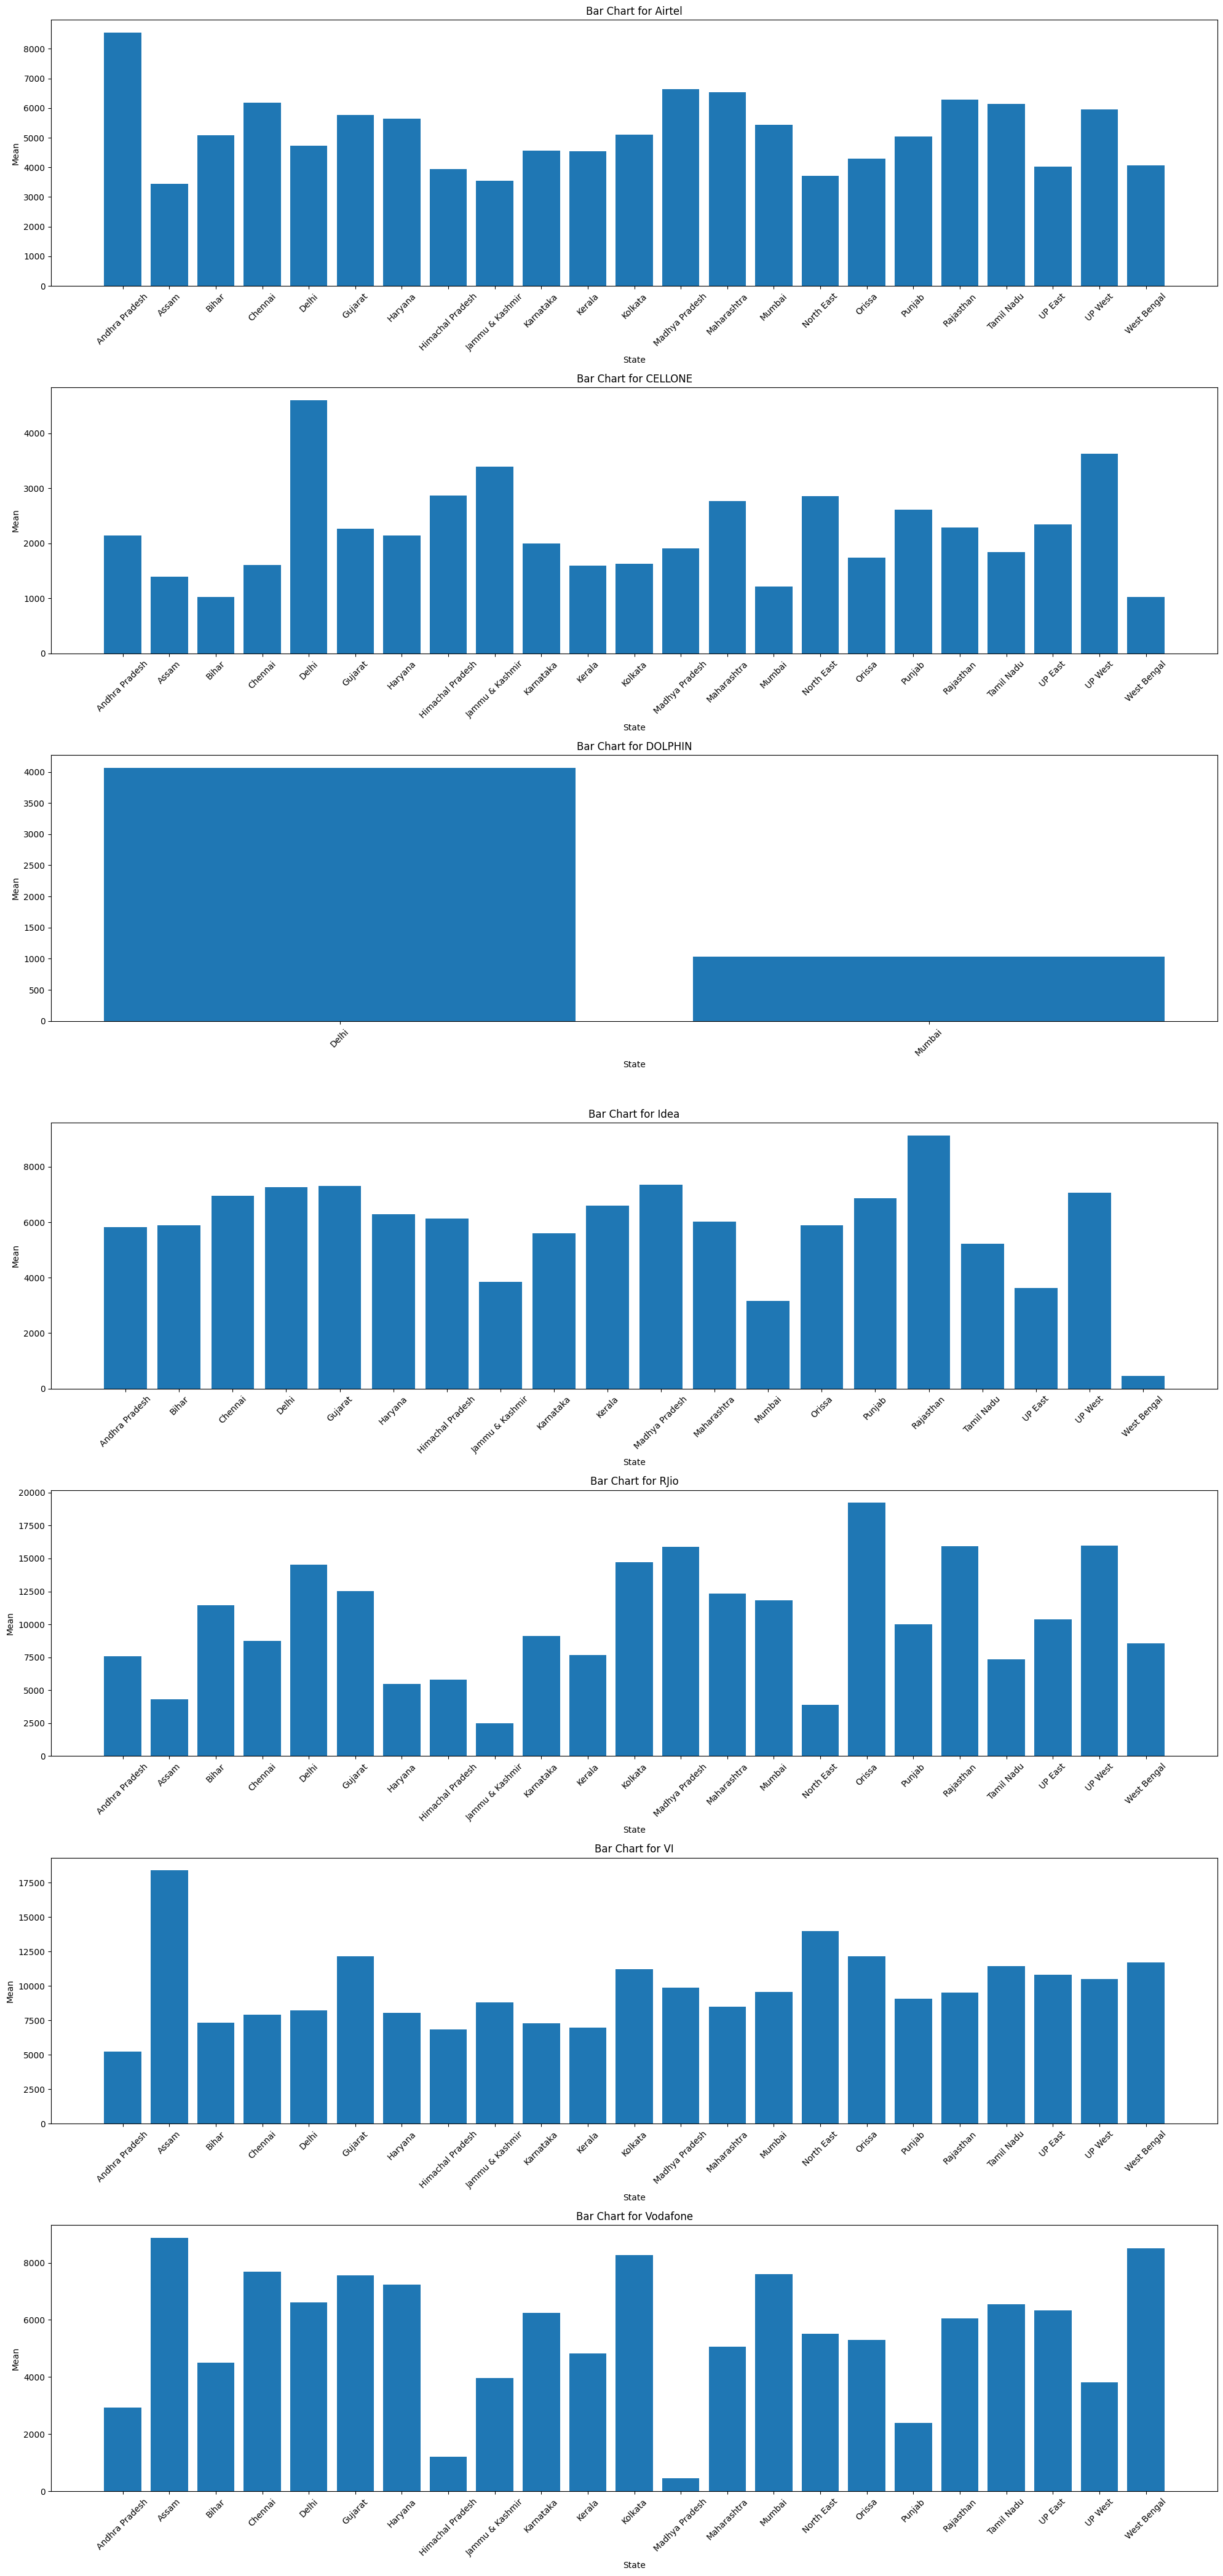

In [40]:
unique_operators = data_speed_based_state['Operator'].unique()
fig, axes = plt.subplots(len(unique_operators), figsize=(20, 6 * len(unique_operators)))

for i, operator in enumerate(unique_operators):
    operator_data = data_speed_based_state[data_speed_based_state['Operator'] == operator]
    ax = axes[i]
    
    # Create a bar chart for the current operator
    ax.bar(operator_data['State_Name'], operator_data['mean'])
    ax.set_xlabel('State')
    ax.set_ylabel('Mean')
    ax.set_title(f'Bar Chart for {operator}')
    ax.set_xticklabels(operator_data['State_Name'], rotation=45)
    
plt.tight_layout()
plt.show()

* Cellone seems to be operative in Delhi,UP,Kashmir regions and gives pretty good data speed
* Dolphin Network provider operates in Delhi and Mumbai Only and data speed is not so high.
* Only Jio gives data speed upto 20000 kbps